In [1]:
# Install all the libraries
!pip install numpy matplotlib soundfile librosa scipy simpleaudio

In [2]:
#import all required libraries

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
import scipy.signal
import simpleaudio as sa


Sample Rate: 22050 Hz
Number of Samples: 178845
Duration: 8.11 seconds


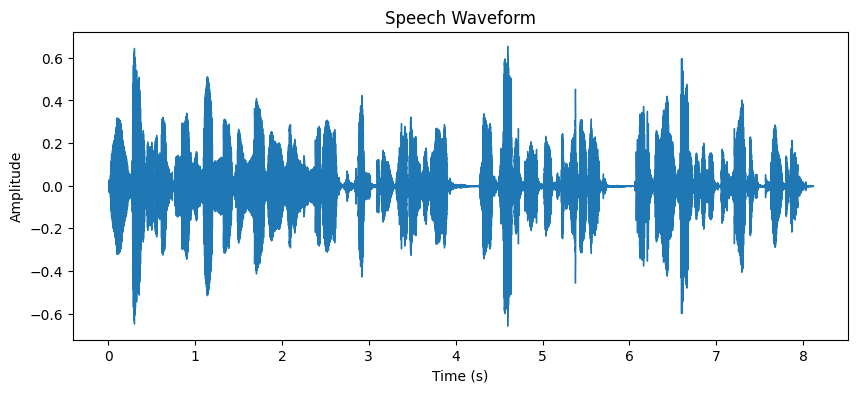

In [3]:
# 1. Load the speech file
filename = "C:\\Users\\prana\\Downloads\\LJ001-0005.wav" 
signal, sample_rate = librosa.load(filename, sr=None) 

# Display basic info sample rate, no. of samples, duration
duration = len(signal) / sample_rate
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Samples: {len(signal)}")
print(f"Duration: {duration:.2f} seconds")

# Plot the waveform of the file
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech Waveform')
plt.show()


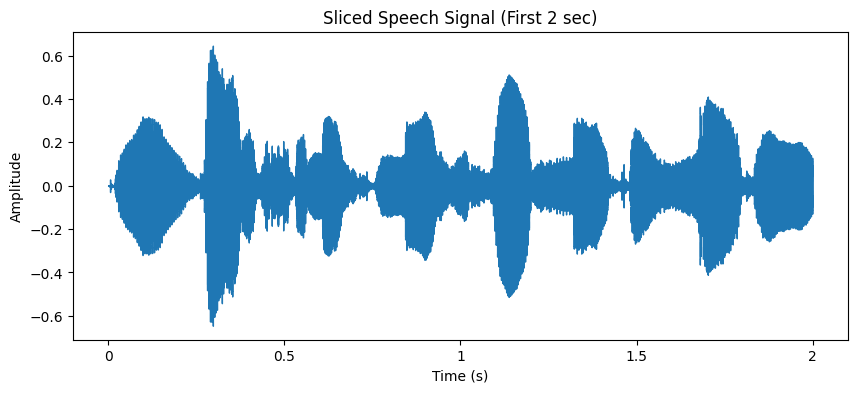

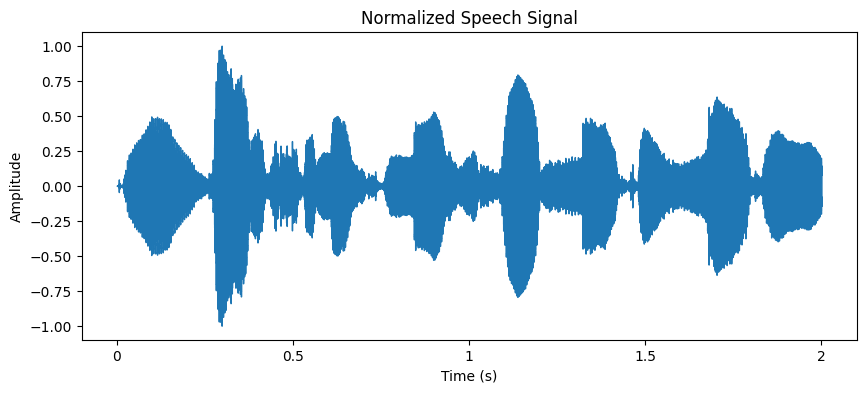

In [4]:
# Extract first 2 seconds of the audio

#  2). i.
slice_samples = int(2 * sample_rate)
sliced_signal = signal[:slice_samples]

# Normalize between -1 and 1
normalized_signal = sliced_signal / np.max(np.abs(sliced_signal))

# Plot sliced signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(sliced_signal, sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sliced Speech Signal (First 2 sec)')
plt.show()

# Plot normalized signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(normalized_signal, sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Normalized Speech Signal')
plt.show()


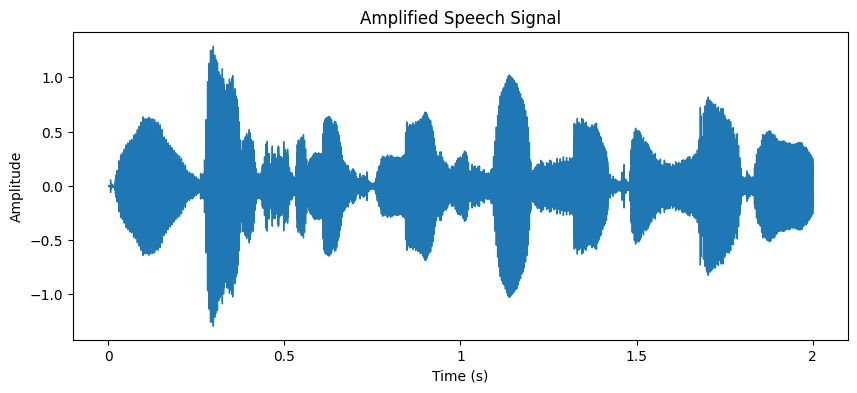

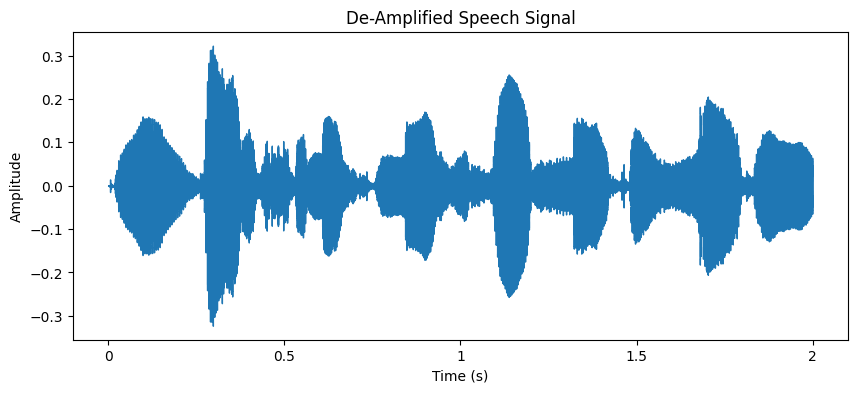

In [5]:
# 2). ii.

# Amplification (Increase Volume)
amplified_signal = sliced_signal * 2.0  

# De-Amplification (Decrease Volume)
deamplified_signal = sliced_signal * 0.5  

# Plot amplified signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(amplified_signal, sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Amplified Speech Signal')
plt.show()

# Plot deamplified signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(deamplified_signal, sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('De-Amplified Speech Signal')
plt.show()


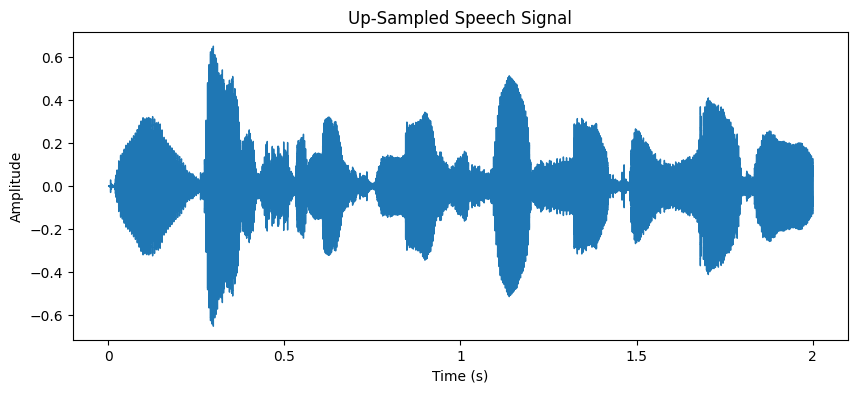

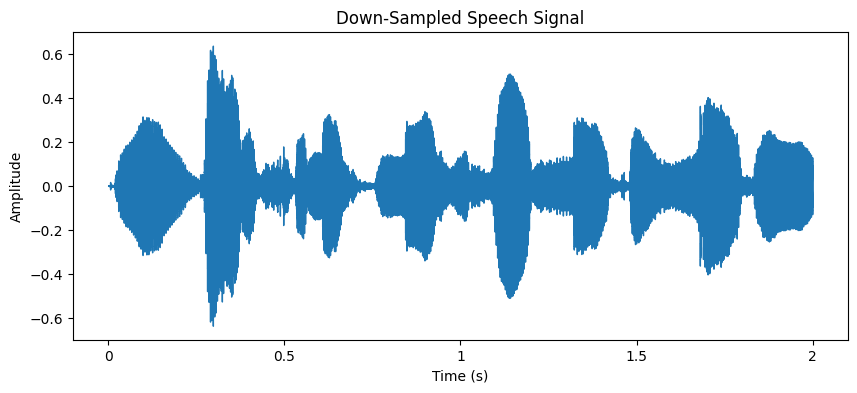

In [6]:
# 2).  ii. 

# Up-sample (increase sample rate)
upsampled_signal = librosa.resample(sliced_signal, orig_sr=sample_rate, target_sr=sample_rate * 2)

# Down-sample (reduce sample rate)
downsampled_signal = librosa.resample(sliced_signal, orig_sr=sample_rate, target_sr=sample_rate // 2)

# Plot upsampled signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(upsampled_signal, sr=sample_rate * 2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Up-Sampled Speech Signal')
plt.show()

# Plot downsampled signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(downsampled_signal, sr=sample_rate // 2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Down-Sampled Speech Signal')
plt.show()


In [7]:
# Convert to 16-bit PCM format for playback
sliced_signal_pcm = (sliced_signal * 32767).astype(np.int16)

# Play the audio
play_obj = sa.play_buffer(sliced_signal_pcm, num_channels=1, bytes_per_sample=2, sample_rate=sample_rate)
play_obj.wait_done()


GITHUB LINK:

https://github.com/PranavAmara05/Speech-Processing